#### Data Exploration: Summerize Data

In [82]:
import pandas as pd
import random
import shelve

In [83]:
%run './libraries.ipynb'

In [84]:
# Load data
shared = shelve.open('.shared_vars')
dfRaw    = load_df("dfraw")
dfDesc   = load_df("dfdesc")


In [85]:
def remap_org(df):
  # Given a dataframe, add a learner field with randome names
  
  url = 'https://gist.githubusercontent.com/Miserlou/11500b2345d3fe850c92/raw/e36859a9eef58c231865429ade1c142a2b75f16e/gistfile1.txt'
  skip = [0,1,2,4]
  # Read in a random name list
  cityDf = pd.read_csv(url, skiprows=skip, skipfooter=26, engine='python')
  # Get the largest cities
  nameList = cityDf[ cityDf['population'] > 900000].city.tolist()
  nameList = [' '.join( [ name, 'Schools' ] ) for name in nameList]
  # Randomize the list
  random.shuffle(nameList)

  # Replace learner id with a random name
  return id_to_name(df, 'org_id', 'org_new', nameList)
  
dfRaw = remap_org(dfRaw)


In [86]:
def remap_learner(df):
  # Given a dataframe, add a learner field with randome names
  
  # Read in a random name list
  nameList = pd.read_csv('https://raw.githubusercontent.com/huntergregal/wordlists/master/names.txt', header=None, names=['list']).list.tolist()
  
  # Randomize the list
  random.shuffle(nameList)
  
  # Replace learner id with a random name
  return id_to_name(df, 'learner_id', 'learner_new', nameList)
  
  

dfRaw = remap_learner(dfRaw)

In [87]:
def remap_section(df):
  # Given a dataframe, add a learner field with randome names
  
  # Read in a random name list
  nameList = pd.read_csv('https://raw.githubusercontent.com/kjhealy/hourly/master/data/famous-people.csv').Name.tolist()
  suffix = ['High', 'Elementry', 'Secondary', 'Prep']
  
  nameList = [' '.join( [ name, suffix[random.randint(0, 3)] ] ) for name in nameList]
  # Randomize the list
  random.shuffle(nameList)

  # Replace learner id with a random name
  return id_to_name(df, 'section_id', 'section_new', nameList)
  
dfRaw = remap_section(dfRaw)

In [88]:
def remap_assessment(df):
  # Given a dataframe, add a learner field with randome names
  
  # Read in a random name list
  fields = ['one', 'two', 'topics', 'question','five','six','seven','eight', 'nine']
  url = 'https://gist.githubusercontent.com/blackwatertepes/5172428/raw/8bf38936cb47f03ed3e0ffb76ea5027d4ff0368a/jeopardy.txt'
  nameList = pd.read_csv(url, header=None, sep='\t', low_memory=False,error_bad_lines=False, names=fields, nrows=2000).topics.tolist()
  
  # Filter out names less than 2 words
  nameList = filter(lambda x: len(x.split()) > 2, nameList) 
  # Title case
  nameList = [name.title() for name in nameList]
  # Randomize the list
  random.shuffle(nameList)
  
  # Replace learner id with a random name
  return id_to_name(df, 'assessment_id', 'assessment_new', nameList)
  

dfRaw = remap_assessment(dfRaw)

###### Number of observations

In [89]:
dfRaw.select().count()

149807

###### Display Descriptions

In [90]:
pd.set_option('display.max_colwidth', None)
dfPd = dfDesc.toPandas()
dfPd

,field,category,type,description
0,assessment_id,Assessment,Categorical Identifier,ID of an Assessment.
1,assessment_instance_attempt_id,Assignment Attempt,Categorical Identifier,ID of a learner's attempt of an assessment.
2,assessment_instance_id,Assessment,Categorical Identifier,ID of a section's instance of an assessment.
3,assessment_item_response_id,Item Attempt,Categorical Identifier,ID of a learners response to an assessment item.
4,assigned_item_status,Item Attempt,Categorical Nominal,"Code indicating the status of the assessment item. Values: scored, offline_scored: manually scored, assigned: not yet started, responded: being scored"
5,assignment_attempt_number,Assignment Attempt,Numeric Continuous,The nth time a certain learner attempted the assessement.
6,assignment_due_date,Assignment,Categorical Interval,The date and time the assignment is due.
7,assignment_final_submission_date,Assignment,Categorical Interval,The date and time the assignment was submitted for scoring.
8,assignment_late_submission,Assignment,Categorical Binary,True if the assignment was submitted late.
9,assignment_max_attempts,Assignment,Numeric Continuous,The number of times a learner can attempt the assessment.


###### Display Categories

In [91]:
dfDesc.select('category').distinct().show(20,False)

+------------------+
|category          |
+------------------+
|Section           |
|Assignment Attempt|
|Item              |
|Assessment        |
|Learner           |
|Organization      |
|Item Attempt      |
|Assignment        |
+------------------+



In [92]:
shared.orgVars               = dfPd.loc[ dfPd['category'] == 'Organization' ].field.tolist()
shared.sectionVars           = dfPd.loc[ dfPd['category'] == 'Section' ].field.tolist()
shared.learnerVars           = dfPd.loc[ dfPd['category'] == 'Learner' ].field.tolist()
shared.assessmentVars        = dfPd.loc[ dfPd['category'] == 'Assessment' ].field.tolist()
shared.assignmentVars        = dfPd.loc[ dfPd['category'] == 'Assignment' ].field.tolist()
shared.itemVars              = dfPd.loc[ dfPd['category'] == 'Item' ].field.tolist()
shared.assignmentAttemptVars = dfPd.loc[ dfPd['category'] == 'Assignment Attempt' ].field.tolist()
shared.itemAttemptVars       = dfPd.loc[ dfPd['category'] == 'Item Attempt' ].field.tolist()

###### Display Sample Data

In [93]:
dfRaw.select(*shared.orgVars, 'org_new').distinct().toPandas()

,org_id,org_new
0,360541,Dallas Schools
1,360421,San Antonio Schools
2,349115,New York Schools


- 3 organizations

In [94]:
dfRaw.filter( F.col('org_id') == 360421).select(*shared.sectionVars, 'section_new').distinct().toPandas()

,section_id,section_new
0,499023,Malala Yousafzai Secondary
1,520208,John M Keynes Prep
2,537231,Anne Frank Elementry
3,498961,Al Gore Prep
4,498945,Jesse Owens Prep
5,498967,Simon Bolivar Prep
6,499047,Oprah Winfrey Elementry
7,499028,Paul McCartney Prep
8,522071,Stephen Hawking Prep
9,499081,Margaret Thatcher Secondary


- 18 sections in organization 360421

In [95]:
dfRaw.filter( F.col('section_id') == 498941).select(*shared.learnerVars, 'learner_new').distinct().toPandas()

,learner_id,learner_new
0,1316043,Caine
1,1248093,Leonard
2,1248228,Anader
3,1332895,Bobbi
4,1317535,Blake
5,1256982,Maddalena
6,1263887,Roscoe
7,1332744,Candide
8,1372550,Chris
9,1313317,Tyronda


- 24 learners in section 498941

In [96]:
dfRaw.filter( F.col('section_id') == 498941).select(*shared.assessmentVars, 'assessment_new').distinct().toPandas()

,assessment_id,assessment_instance_id,assessment_new
0,720657,799125,The 20Th Century
1,720511,813988,A Study In Scarlet
2,720761,879857,Someday My Prints Will Come
3,720591,878024,Where Am I?
4,721235,876562,Classic Tv Quotes
5,721038,846625,17Th Century Science


- 6 assessments in section 498941

###### Display Assignments for Section 498941

In [97]:
dfRaw.filter( F.col('section_id') == 498941).select('assessment_new', *shared.assignmentVars).distinct().orderBy('assignment_due_date').toPandas()

,assessment_new,assignment_due_date,assignment_final_submission_date,assignment_late_submission,assignment_max_attempts,assignment_start_date,ced_assignment_type_code,is_affecting_grade,max_student_stop_datetime,min_student_start_datetime,number_of_distinct_instance_items,number_of_learners
0,17Th Century Science,2019-10-30 04:59:00,2019-10-30 04:59:00,False,1,2019-10-28 05:00:00,clo,True,2019-11-16 04:09:25.260000,2019-10-28 19:49:28.028000,2,27
1,The 20Th Century,2019-11-06 05:59:00,2019-11-06 05:59:00,False,1,2019-10-31 05:00:00,assessment,True,2019-11-05 23:21:59.287000,2019-10-31 19:19:21.510000,18,27
2,Where Am I?,2020-01-18 05:59:00,2020-01-18 05:59:00,False,1,2020-01-16 06:00:00,assessment,True,2020-01-17 20:11:14.079000,2020-01-16 20:18:26.011000,19,23
3,A Study In Scarlet,2020-02-15 05:59:00,2020-02-15 05:59:00,False,1,2020-02-13 06:00:00,assessment,True,2999-01-01 00:00:00,1900-01-01 00:00:00,9,23
4,Classic Tv Quotes,2020-02-29 05:59:00,2020-02-29 05:59:00,False,1,2020-02-27 06:00:00,assessment,True,2020-02-29 06:00:06.925000,2020-02-27 21:04:03.241000,10,22
5,Someday My Prints Will Come,2020-04-12 04:59:00,2020-04-12 04:59:00,False,1,2020-04-09 05:00:00,assessment,True,2020-04-12 04:59:13.840000,2020-04-09 17:00:20.741000,12,23


- 6 assignments (one for each assessment) in section 498941

###### Display Assignment Items for Assessment 720657 of Section 498941

In [98]:
dfRaw.filter( F.col('assessment_id') == 720657).select(*shared.itemVars).distinct().toPandas()

,item_is_offline_scored,item_type_code_name,scoring_type_code
0,False,None,[unassigned]
1,True,trueFalse,automatic
2,False,multipleChoice,automatic
3,False,matching,automatic
4,False,essay,[unassigned]
5,False,shortAnswer,[unassigned]
6,False,trueFalse,automatic


- 7 items in assessment 720657
- 1 item (true/false) is offline scored
- 4 items automatice scoring code and 3 unassigned

###### Display Assignment Attempt for Attempt 1115526

In [99]:
dfRaw.filter( F.col('assessment_instance_attempt_id') == 1115526 ).select(*shared.assignmentAttemptVars).distinct().toPandas()

,assessment_instance_attempt_id,assignment_attempt_number,final_score_unweighted,is_force_scored,is_manual_scoring_required,learner_assignment_attempt_id,learner_attempt_status,points_possible_unweighted,scored_datetime,student_start_datetime,student_stop_datetime,was_fully_scored_datetime,was_in_progress_datetime,was_submitted_datetime_actual
0,1115526,1,0,False,False,1050015,in progress,39.0,2999-01-01 00:00:00+00,2019-11-03 22:41:04.219000,2999-01-01 00:00:00,2999-01-01 00:00:00,2019-11-03 22:41:04.219000,2999-01-01 00:00:00


- Attempt is in progress (not finished)
- Empty (default) scored_datetime, student_stop_datetime, was_fully_scored_datetime, was_submitted_datetime_actual
- Final score is 0
- Same values in student_start_datetime and was_in_progress_datetime

###### Display Assignment Attempt for Attempt 1159455

In [100]:
dfRaw.filter( F.col('assessment_instance_attempt_id') == 1159455 ).select(*shared.assignmentAttemptVars).distinct().toPandas()

,assessment_instance_attempt_id,assignment_attempt_number,final_score_unweighted,is_force_scored,is_manual_scoring_required,learner_assignment_attempt_id,learner_attempt_status,points_possible_unweighted,scored_datetime,student_start_datetime,student_stop_datetime,was_fully_scored_datetime,was_in_progress_datetime,was_submitted_datetime_actual
0,1159455,1,9,False,False,965818,fully scored,12.0,2020-04-11 03:59:35+00,2020-04-09 18:30:43.079000,2020-04-11 03:59:35.992000,2020-04-11 03:59:35,2020-04-09 18:30:43.079000,2020-04-11 03:59:35.992000


- Attempt is finished (fully scored)

###### Display Assignment Attempt Items for Attempt 1115526

In [101]:
dfRaw.filter( F.col('assessment_instance_attempt_id') == 1115526 ).select(*shared.itemAttemptVars).distinct().toPandas()

,assessment_item_response_id,assigned_item_status,is_deleted,learner_assigned_item_attempt_id,response_correctness
0,1572894.0,scored,False,1531985,correct
1,1592595.0,scored,False,1532003,correct
2,1626110.0,scored,False,1532004,correct
3,1571371.0,scored,False,1531981,incorrect
4,1561797.0,scored,False,1531983,incorrect
5,1616296.0,scored,False,1531998,incorrect
6,1571743.0,scored,False,1532001,correct
7,1556172.0,scored,False,1532002,correct
8,1652901.0,scored,False,1532000,incorrect
9,1631451.0,scored,False,1531984,incorrect


- 16 observations
- 15 answered (scored)
  - 7 correct
  - 7 incorrect
  - 1 partically correct
- 1 not answered (delivered)
  - assessment not completed

###### Display Assignment Attempt Items for Attempt 1159455

In [102]:
dfRaw.filter( F.col('assessment_instance_attempt_id') == 1159455 ).select(*shared.itemAttemptVars).distinct().toPandas()

,assessment_item_response_id,assigned_item_status,is_deleted,learner_assigned_item_attempt_id,response_correctness
0,1596516,scored,False,1413322,correct
1,1581835,scored,False,1413319,correct
2,1549179,scored,False,1413324,correct
3,1547897,scored,False,1413317,incorrect
4,1635317,scored,False,1413318,correct
5,1585073,scored,False,1413325,correct
6,1622897,scored,False,1413321,incorrect
7,1616794,scored,False,1413316,correct
8,1586273,scored,False,1413320,correct
9,1554205,scored,False,1413323,correct


##### Display Variables

###### Display Categorical Identifier Variables

In [103]:
# Save field names
identifierVarObs = dfDesc.filter("type = 'Categorical Identifier'")
shared.identifierVars = [row['field'] for row in identifierVarObs.select('field').collect()]
identifierVarObs.select(F.col('field').alias('Categorical Identifier')).show(20,False)

+--------------------------------+
|Categorical Identifier          |
+--------------------------------+
|assessment_id                   |
|assessment_instance_attempt_id  |
|assessment_instance_id          |
|assessment_item_response_id     |
|learner_assigned_item_attempt_id|
|learner_assignment_attempt_id   |
|learner_id                      |
|org_id                          |
|section_id                      |
+--------------------------------+



###### Display Categorical Nominal Variables

In [104]:
nominalVarObs    = dfDesc.filter("type = 'Categorical Nominal'")
shared.nominalVars = [row['field'] for row in nominalVarObs.select('field').collect()]
nominalVarObs.select(F.col('field').alias('Categorical Nominal')).show(20,False)

+------------------------+
|Categorical Nominal     |
+------------------------+
|assigned_item_status    |
|ced_assignment_type_code|
|item_type_code_name     |
|learner_attempt_status  |
|response_correctness    |
|scoring_type_code       |
+------------------------+



###### Display Numeric Continuous Variables

In [105]:
continousVarObs  = dfDesc.filter("type = 'Numeric Continuous'")
shared.continousVars = [row['field'] for row in continousVarObs.select('field').collect()]
continousVarObs.select(F.col('field').alias('Numeric Continuous')).show(20,False)

+---------------------------------+
|Numeric Continuous               |
+---------------------------------+
|assignment_attempt_number        |
|assignment_max_attempts          |
|final_score_unweighted           |
|number_of_distinct_instance_items|
|number_of_learners               |
|points_possible_unweighted       |
+---------------------------------+



###### Display Categorical Interval Varibles

In [106]:
intervalVarObs   = dfDesc.filter("type = 'Categorical Interval'")
shared.intervalVars = [row['field'] for row in intervalVarObs.select('field').collect()]
intervalVarObs.select(F.col('field').alias('Categorical Interval')).show(20,False)

+--------------------------------+
|Categorical Interval            |
+--------------------------------+
|assignment_due_date             |
|assignment_final_submission_date|
|assignment_start_date           |
|max_student_stop_datetime       |
|min_student_start_datetime      |
|scored_datetime                 |
|student_start_datetime          |
|student_stop_datetime           |
|was_fully_scored_datetime       |
|was_in_progress_datetime        |
|was_submitted_datetime_actual   |
+--------------------------------+



In [107]:
binaryVarObs     = dfDesc.filter("type = 'Categorical Binary'")
shared.binaryVars = [row['field'] for row in binaryVarObs.select('field').collect()]
binaryVarObs.select(F.col('field').alias('Categorical Binary')).show(20,False)


+--------------------------+
|Categorical Binary        |
+--------------------------+
|assignment_late_submission|
|is_affecting_grade        |
|is_deleted                |
|is_force_scored           |
|is_manual_scoring_required|
|item_is_offline_scored    |
+--------------------------+



In [108]:
# Schema
dfRaw.printSchema()

root
 |-- ced_assignment_type_code: string (nullable = true)
 |-- is_affecting_grade: boolean (nullable = true)
 |-- number_of_learners: integer (nullable = true)
 |-- number_of_distinct_instance_items: integer (nullable = true)
 |-- assignment_max_attempts: integer (nullable = true)
 |-- assignment_late_submission: boolean (nullable = true)
 |-- assignment_final_submission_date: string (nullable = true)
 |-- assignment_start_date: string (nullable = true)
 |-- assignment_due_date: string (nullable = true)
 |-- min_student_start_datetime: string (nullable = true)
 |-- max_student_stop_datetime: string (nullable = true)
 |-- assignment_attempt_number: integer (nullable = true)
 |-- was_fully_scored_datetime: string (nullable = true)
 |-- was_submitted_datetime_actual: string (nullable = true)
 |-- was_in_progress_datetime: string (nullable = true)
 |-- is_force_scored: boolean (nullable = true)
 |-- is_manual_scoring_required: boolean (nullable = true)
 |-- student_start_datetime: strin

In [117]:
dfFlt = dfRaw.filter(F.col('learner_attempt_status') == 'fully scored')

In [118]:
%run './convert-default-dates.ipynb'

assignment_due_date = 1566
assignment_final_submission_date = 1566
assignment_start_date = 1566
student_start_datetime = 749
student_stop_datetime = 749
was_fully_scored_datetime = 750
was_in_progress_datetime = 9965
was_submitted_datetime_actual = 18469


In [119]:
for f in shared.identifierVars:
  print(f)
  dfFlt.agg(
    F.countDistinct(f).alias('unique'), 
    F.count(F.when(F.col(f).isNull(), f)).alias('null')
  ).show()

assessment_id
+------+----+
|unique|null|
+------+----+
|   329|   0|
+------+----+

assessment_instance_attempt_id
+------+----+
|unique|null|
+------+----+
|  8483|3264|
+------+----+

assessment_instance_id
+------+----+
|unique|null|
+------+----+
|   615|   0|
+------+----+

assessment_item_response_id
+------+-----+
|unique| null|
+------+-----+
| 64368|15710|
+------+-----+

learner_assigned_item_attempt_id
+------+----+
|unique|null|
+------+----+
| 79689|   0|
+------+----+

learner_assignment_attempt_id
+------+----+
|unique|null|
+------+----+
|  8855|   0|
+------+----+

learner_id
+------+----+
|unique|null|
+------+----+
|  1126|   0|
+------+----+

org_id
+------+----+
|unique|null|
+------+----+
|     3|   0|
+------+----+

section_id
+------+----+
|unique|null|
+------+----+
|    46|   0|
+------+----+



Totals
- org_id: 3
  - ID per organization
- section_id: 46
  - ID per section/school
- learner_id: 1126
  - ID per learner/student
- assessment_id: 329
  - ID per each assessment/quiz.  
- assessment_instance_id: 615
  - ID of each time a section uses the assessment
- assessment_instance_attempt_id: 8483 null: 3264
  - ID of each time an assessment is attempted by a student
- assessment_item_response_id: 64368 null: 15710
  - ID of each response/answer to an assessment question
- learner_assignment_attempt_id: 8855
  - ID of each learner attempt of an assigned assessment
- learner_assigned_item_attempt_id: 79689
  - ID of each learner attempt of a item/question on an assigned assessment

###### Variable Descriptive Statistics

In [120]:
# Categorical / Nominal Values
for f in shared.nominalVars:
  dfFlt.groupBy(f).count().orderBy('count', ascending=False).show(50, False)
  

+--------------------+-----+
|assigned_item_status|count|
+--------------------+-----+
|scored              |64804|
|offline_scored      |12446|
|assigned            |3264 |
|responded           |34   |
+--------------------+-----+

+------------------------+-----+
|ced_assignment_type_code|count|
+------------------------+-----+
|assessment              |76172|
|practice                |2562 |
|game                    |1555 |
|clo                     |248  |
|rubric                  |11   |
+------------------------+-----+

+----------------------+-----+
|item_type_code_name   |count|
+----------------------+-----+
|multipleChoice        |32451|
|fillInTheBlank        |12072|
|equationEntry         |9516 |
|trueFalse             |4963 |
|cloze                 |3576 |
|null                  |3264 |
|multipleSelect        |2691 |
|graphing              |2415 |
|MultipleChoiceResponse|1550 |
|choiceMatrix          |1336 |
|matching              |1164 |
|bucketing             |1051 |
|sel

##### Null Values
- response_correctness
  - 3298 null values
    - investigate further
  - 1566 "[unassigned]"
    - investigate further for relation to the 1566 assignment_attempt_number and assignment_max_attempts values
  - Could be null because the question wasn't answered or a different method of scoring the question
- item_type_code_name
  - Investigate further
  - Could be related to unstarted or unanswered questions

##### Large number of categorical values
- item_type_code_name
  - Need to transform by reclassifying to reduce number of levels
  
##### learner_attempt_status
- Unary "fully scored"

In [121]:
# Create Todo list
add_todo('Investigate 3298 null values in response_correctness')
add_todo('Investigate 1566 [unassigned] in response_correctness')
add_todo('Investigate null values in item_type_code_name')
add_todo('Reduce number of levels in item_type_code_name')
add_todo('Remove unary learner_attempt_status = "fully scored"')

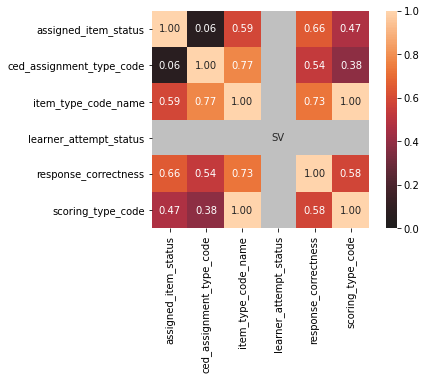

In [122]:
corr, ax = associations( dfFlt.select(*shared.nominalVars).toPandas(), nan_replace_value='null' )

- High correlation between item_type_code_name and scoring_type_code
- learner_attempt_status a single value ('fully scored)

In [123]:
def item_to_code():
  dfPd = dfFlt.select('item_type_code_name','scoring_type_code').toPandas()
  return pd.crosstab(dfPd.item_type_code_name.fillna('null'), dfPd.scoring_type_code.fillna('null'), margins=True, margins_name="Total")
  
item_to_code()

scoring_type_code,[unassigned],automatic,external,manual,Total
item_type_code_name,,,,,
FillinBlankResponse,5,0,0,0,5
MultipleChoiceResponse,1550,0,0,0,1550
RubricResponse,11,0,0,0,11
aheAlgo,0,0,219,0,219
bucketing,0,1051,0,0,1051
choiceMatrix,0,1336,0,0,1336
cloze,0,3576,0,0,3576
equationEntry,0,9516,0,0,9516
essay,9,0,0,991,1000


- item_type_code_name indicates the scoring_type_code
  - scoring_type_code = '[unnassigned]' for item_type_code_name is..
    - shortAnswer, null, essay (9 times), RubricResponse, MultipleChoiceResponse, FillInBlankResponse
  - scoring_type_code = external only for item_type_code_name = aheAlgo
  - scoring_type_code = 'manual' for item_type_code_name is..
    - essay, fileUpload, shortAnswer

In [124]:
def num_cont_vars():
  # Numerical / Continuous Variables
  desc = dfFlt.describe()
  for f in shared.continousVars:
    desc.select("summary", f).show(5,False)

num_cont_vars()

+-------+-------------------------+
|summary|assignment_attempt_number|
+-------+-------------------------+
|count  |80548                    |
|mean   |0.9805581764910364       |
|stddev |0.13807271883793756      |
|min    |0                        |
|max    |1                        |
+-------+-------------------------+

+-------+-----------------------+
|summary|assignment_max_attempts|
+-------+-----------------------+
|count  |80548                  |
|mean   |0.9805581764910364     |
|stddev |0.13807271883793756    |
|min    |0                      |
|max    |1                      |
+-------+-----------------------+

+-------+----------------------+
|summary|final_score_unweighted|
+-------+----------------------+
|count  |80548                 |
|mean   |13.131449570442468    |
|stddev |14.834671089990382    |
|min    |0                     |
|max    |60                    |
+-------+----------------------+

+-------+---------------------------------+
|summary|number_of_distinc

assignment_attempt_number
assignment_max_attempts
final_score_unweighted
number_of_distinct_instance_items
number_of_learners
points_possible_unweighted


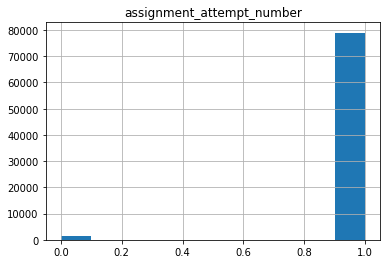

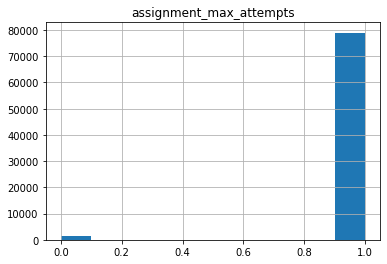

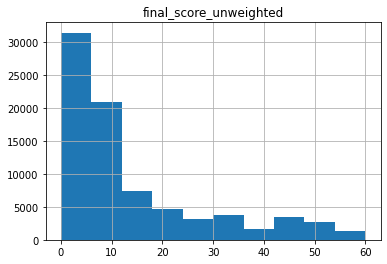

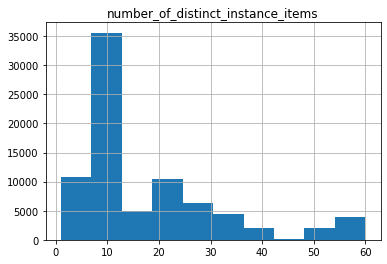

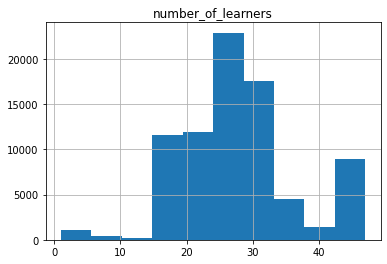

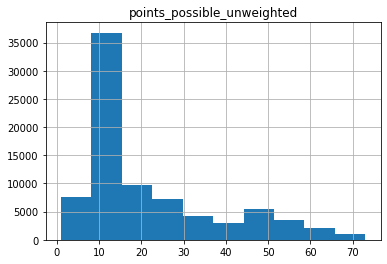

In [125]:
for f in shared.continousVars:
  print(f)
  dfFlt.select(f).toPandas().hist()

Normal Distribution
- number_of_learners
- possible outliers greaterthan 40
- investigate further

Right Skewed
- final_score_unweighted
- number_of_distinct_instance_items
- points_possible_unweighted

Binary Values (0/1)
- assignment_max_attempts
- assignment_attempt_number
- Appears binary but the variable name indicates it could have any values. The data only contains 1 and 0
- Investigate further

In [126]:
add_todo("Investigate number_of_learners > 40 outliers")
add_todo("Investigate binary variables assignment_attempt_number and assignment_max_attempts")

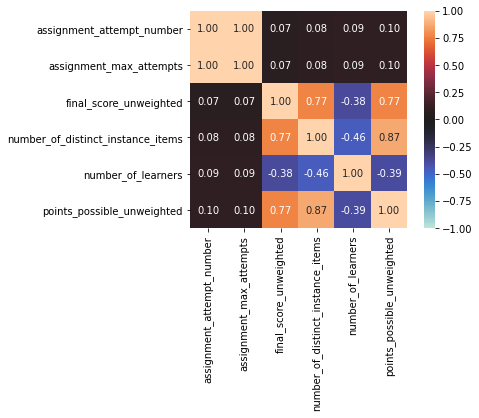

In [127]:
corr, ax = associations( dfFlt.select(*shared.continousVars).toPandas(), nan_replace_value='null' )

- assignment_attempt_number and assignment_max_attempts highly correlated

In [128]:
def attempt_to_max():
  dfPd = dfFlt.select('assignment_attempt_number', 'assignment_max_attempts').toPandas()
  return pd.crosstab(dfPd.assignment_attempt_number.fillna('null'), dfPd.assignment_max_attempts.fillna('null'), margins=True, margins_name="Total")
  
attempt_to_max()

assignment_max_attempts,0,1,Total
assignment_attempt_number,,,
0,1566,0,1566
1,0,78982,78982
Total,1566,78982,80548


- assignment_max_attempts 1 is always assignment_attempt_number = 1

In [129]:
for c in shared.continousVars:
  print(c)
  dfFlt.agg(
    F.count(F.when(F.col(c).isNull(), c)).alias('null'),
    F.count(F.when(F.col(c) == 0, c)).alias("zero")
  ).show()

assignment_attempt_number
+----+----+
|null|zero|
+----+----+
|   0|1566|
+----+----+

assignment_max_attempts
+----+----+
|null|zero|
+----+----+
|   0|1566|
+----+----+

final_score_unweighted
+----+-----+
|null| zero|
+----+-----+
|   0|16582|
+----+-----+

number_of_distinct_instance_items
+----+----+
|null|zero|
+----+----+
|   0|   0|
+----+----+

number_of_learners
+----+----+
|null|zero|
+----+----+
|   0|   0|
+----+----+

points_possible_unweighted
+----+----+
|null|zero|
+----+----+
|   0|   0|
+----+----+



- possibile correlation between assignment_attempt_number and assignment_max_attempts
  - both have 1566 zero values
  - Needs further investigation
- final_score_unweighted has 16,582 zero values
  - possibly because not yet scored
  - needs further investigation

In [130]:
add_todo('Investigate assignment_attempt_number and assignment_max_attempts both have 1566 values')
add_todo('Investigate final_score_unweighted has 16,582 zero values')

In [131]:
for f in shared.intervalVars:
  print (f)
  dfFlt.agg(
    F.countDistinct(f).alias('unique'), 
    F.count(F.when(F.col(f).isNull(), f)).alias('null'),
    F.min(f).alias('min'),
    F.max(f).alias('max')
 ).show(1, False)

assignment_due_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|190   |1566|2019-08-23 04:59:00|2020-05-26 04:59:00|
+------+----+-------------------+-------------------+

assignment_final_submission_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|199   |1566|2019-08-23 04:59:00|2020-06-05 04:59:00|
+------+----+-------------------+-------------------+

assignment_start_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|206   |1566|2019-08-21 05:00:00|2020-05-19 05:00:00|
+------+----+-------------------+-------------------+

max_student_stop_datetime
+------+----+--------------------------+--------------------------+
|unique|null|min  

Default Date Values
- All variables have some dates have default values '2999-01-01 00:00:00' as max and '1900-01-01 00:00:00' as min
- Almost all interval variables
  - except max_student_stop_datetime and max_student_stop_datetime
- These are substitutes for no value and will need to be replaced nulls
- Further investigation is needed as what the nulls mean

In [132]:
add_todo('Replace default dates with nulls')
add_todo('Investigate why some dates are null')

In [133]:
corr, ax = associations( dfFlt.select(* (F.unix_timestamp(c).alias(c) for c in shared.intervalVars) ).toPandas(), figsize=[10,10] )

Py4JJavaError: An error occurred while calling o15226.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 512.0 failed 1 times, most recent failure: Lost task 2.0 in stage 512.0 (TID 28066, duanes-macbook.lan, executor driver): org.apache.spark.SparkUpgradeException: You may get a different result due to the upgrading of Spark 3.0: Fail to parse '2019-11-22 12:54:16.795000' in the new parser. You can set spark.sql.legacy.timeParserPolicy to LEGACY to restore the behavior before Spark 3.0, or set to CORRECTED and treat it as an invalid datetime string.
	at org.apache.spark.sql.catalyst.util.DateTimeFormatterHelper$$anonfun$checkParsedDiff$1.applyOrElse(DateTimeFormatterHelper.scala:150)
	at org.apache.spark.sql.catalyst.util.DateTimeFormatterHelper$$anonfun$checkParsedDiff$1.applyOrElse(DateTimeFormatterHelper.scala:141)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.sql.catalyst.util.Iso8601TimestampFormatter.$anonfun$parse$1(TimestampFormatter.scala:86)
	at scala.runtime.java8.JFunction0$mcJ$sp.apply(JFunction0$mcJ$sp.java:23)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.catalyst.util.Iso8601TimestampFormatter.parse(TimestampFormatter.scala:77)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:729)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:340)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:872)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:872)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:349)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:313)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:446)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:449)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1135)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:844)
Caused by: java.time.format.DateTimeParseException: Text '2019-11-22 12:54:16.795000' could not be parsed, unparsed text found at index 19
	at java.base/java.time.format.DateTimeFormatter.parseResolved0(DateTimeFormatter.java:2049)
	at java.base/java.time.format.DateTimeFormatter.parse(DateTimeFormatter.java:1874)
	at org.apache.spark.sql.catalyst.util.Iso8601TimestampFormatter.$anonfun$parse$1(TimestampFormatter.scala:78)
	... 20 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2008)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2007)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2007)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:973)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2239)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2188)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2177)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:775)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2120)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2139)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2164)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1004)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:388)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1003)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:385)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:3450)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3618)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:100)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:160)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:87)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:764)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3616)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3447)
	at jdk.internal.reflect.GeneratedMethodAccessor76.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:564)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:844)
Caused by: org.apache.spark.SparkUpgradeException: You may get a different result due to the upgrading of Spark 3.0: Fail to parse '2019-11-22 12:54:16.795000' in the new parser. You can set spark.sql.legacy.timeParserPolicy to LEGACY to restore the behavior before Spark 3.0, or set to CORRECTED and treat it as an invalid datetime string.
	at org.apache.spark.sql.catalyst.util.DateTimeFormatterHelper$$anonfun$checkParsedDiff$1.applyOrElse(DateTimeFormatterHelper.scala:150)
	at org.apache.spark.sql.catalyst.util.DateTimeFormatterHelper$$anonfun$checkParsedDiff$1.applyOrElse(DateTimeFormatterHelper.scala:141)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.sql.catalyst.util.Iso8601TimestampFormatter.$anonfun$parse$1(TimestampFormatter.scala:86)
	at scala.runtime.java8.JFunction0$mcJ$sp.apply(JFunction0$mcJ$sp.java:23)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.catalyst.util.Iso8601TimestampFormatter.parse(TimestampFormatter.scala:77)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:729)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:340)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:872)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:872)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:349)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:313)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:446)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:449)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1135)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	... 1 more
Caused by: java.time.format.DateTimeParseException: Text '2019-11-22 12:54:16.795000' could not be parsed, unparsed text found at index 19
	at java.base/java.time.format.DateTimeFormatter.parseResolved0(DateTimeFormatter.java:2049)
	at java.base/java.time.format.DateTimeFormatter.parse(DateTimeFormatter.java:1874)
	at org.apache.spark.sql.catalyst.util.Iso8601TimestampFormatter.$anonfun$parse$1(TimestampFormatter.scala:78)
	... 20 more


- Correlated dates
  - assignment_due_date and assignment_final_submission_date
  - assigment_due_date and assignment_start_date 
  - min_student_start_datetime and max_student_start_datetime
  - student_start_datetime and student_stop_datetime
  - student_start_datetime and was_fully_scored_datetime
  - student_stop_datetime and was_fully_scored_datetime
- Correlation appears to be because the events closely follow each other

In [ ]:
# Categorical / Interval Variables
defaults = ["2999-01-01 00:00:00","1900-01-01 00:00:00"]

for f in shared.intervalVars:
  print (f)
  dfFlt.agg(
    F.countDistinct(f).alias('unique'), 
    F.count( F.when(F.col(f).isNull(), f)).alias('null'),
    F.min( F.when(F.col(f).isin(defaults) == False, F.col(f) )).alias('min'),
    F.max( F.when(F.col(f).isin(defaults) == False, F.col(f) )).alias('max')
 ).show(1, False)

Dates fall in range of a school year of 8/2019 to 5/2020

In [ ]:
# Categorical / Nominal Values
for f in shared.binaryVars:
  dfFlt.groupBy(f).count().orderBy('count', ascending=False).show(50, False)

Variables With Unary Values
- assignment_late_submission and is_deleted
- is_manual_scoring_required has only one true value
- Variables will be removed

In [ ]:
corr, ax = associations( dfFlt.select(*shared.binaryVars).toPandas(), nan_replace_value='null' )

- No correlation

In [ ]:
add_todo("Remove variables assignment_late_submission, is_manual_scoring_required and is_deleted")

In [ ]:
corr, ax = associations( dfFlt.select(*shared.binaryVars, *shared.nominalVars).toPandas(), nan_replace_value='null', figsize=[10,10] )

- New correlations
  - is_affecting_grade and ced_assignment_type_code
  - item_is_offline_scored and assigned_item_status

In [ ]:
def grade_to_code():
  dfPd = dfFlt.select('is_affecting_grade','ced_assignment_type_code').toPandas()
  return pd.crosstab(dfPd.is_affecting_grade.fillna('null'), dfPd.ced_assignment_type_code.fillna('null'), margins=True, margins_name="Total")
  
grade_to_code()

- is_affecting_grade = false when ced_assignment_type_code = practice

In [ ]:
def offline_to_status():
  dfPd = dfFlt.toPandas()
  return pd.crosstab(dfPd.item_is_offline_scored.fillna('null'), dfPd.assigned_item_status.fillna('null'), margins=True, margins_name="Total")
  
offline_to_status()

- item_is_offline_scored = True is always assigned_item_status = offline_scored

In [ ]:
def sections_by_org():
  sByO = dfFlt.groupBy('org_new').agg(F.countDistinct('section_id').alias('sections')).orderBy('org_new')
  pdDf = sByO.toPandas()

  # Add mean
  meanSections = sByO.agg(F.round(F.avg(F.col('sections'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'sections': meanSections}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','sections', title='Num Sections by Organization')
  annotate_plot(ax)
  plt.show()
  
sections_by_org()

In [ ]:
def learners_by_org():
  lByO = dfFlt.groupBy('org_new').agg(F.countDistinct('learner_id').alias('learners')).orderBy('org_new')
  pdDf = lByO.toPandas()

  # Add mean
  meanlearners = lByO.agg(F.round(F.avg(F.col('learners'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'learners': meanlearners}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','learners', title='Num Learners by Organization')
  annotate_plot(ax)
  plt.show()
  
learners_by_org()

In [ ]:
def sec_learners_by_org():
  lByS = dfFlt.groupBy('org_new','section_id').agg(F.countDistinct('learner_id').alias('learners'))
  # Av
  lBySMean = lByS.groupBy('org_new').agg( F.avg('learners').alias('learners') ).orderBy('org_new')
  pdDf = lBySMean.toPandas()

  # Add mean
  meanlearners = lBySMean.agg(F.round(F.avg(F.col('learners'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'learners': meanlearners}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','learners', title='Mean Section Learners by Organization')
  annotate_plot(ax)
  plt.show()
  
sec_learners_by_org()

In [ ]:
def sec_assess_by_org():
  assessBySection = dfFlt.groupBy('org_new','section_id').agg(F.countDistinct('assessment_id').alias('assessments'))
  aByS = assessBySection.groupBy('org_new').agg( F.avg('assessments').alias('assessments') ).orderBy('org_new')

  pdDf = aByS.toPandas()

  # Add mean
  meanAssess = aByS.agg(F.round(F.avg(F.col('assessments'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'assessments': meanAssess}, ignore_index=True)


  ax = pdDf.plot.bar('org_new','assessments', title='Mean Section Assessments by Organization')
  annotate_plot(ax)
  plt.show()
  
sec_assess_by_org()

In [ ]:
def assess_by_org():
  assessBySection = dfFlt.groupBy('org_new','learner_id').agg(F.countDistinct('assessment_id').alias('assessments'))
  aByS = assessBySection.groupBy('org_new').agg( F.avg('assessments').alias('assessments') ).orderBy('org_new')

  pdDf = aByS.toPandas()

  # Add mean
  meanAssess = aByS.agg(F.round(F.avg(F.col('assessments'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'assessments': meanAssess}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','assessments', title='Mean Learners Assessments by Organization')
  annotate_plot(ax)
  plt.show()
  
assess_by_org()

In [ ]:
# scores by orgs
def scores_by_orgs():
  sByO = dfFlt.groupBy('org_new').agg( F.avg('final_score_unweighted').alias('scores') ).orderBy('org_new')

  pdDf = sByO.toPandas()

  # Add mean
  meanAssess = sByO.agg(F.round(F.avg(F.col('scores'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_new': 'mean', 'scores': meanAssess}, ignore_index=True)

  ax = pdDf.plot.bar('org_new','scores', title='Mean Scores by Organization')
  annotate_plot(ax)
  plt.show()
  
scores_by_orgs()

In [ ]:
shared.close()
save_df(todoList, "todolist")
save_df(dfFlt,    "dfflt")